In [57]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv('house_pricing_dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
#the top 10 cities
top_city = df['city'].value_counts()  #checking top citis
top_city

top_10_city = df[df['city'].isin(['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kirkland', 'Kent', 'Auburn', 'Sammamish', 'Federal Way'])]
top_10_city



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,4.900000e+05,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,2014-07-09 00:00:00,2.106143e+05,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA


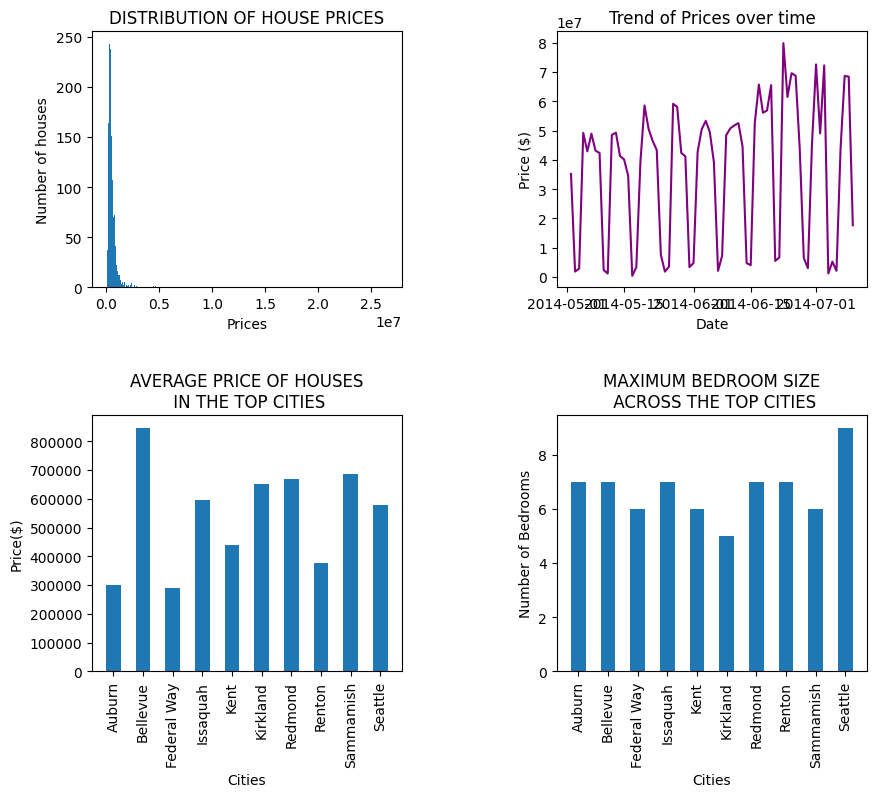

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

#The distribution of house prices
average_prices = top_10_city.groupby('city').price.mean().reset_index()                 #top_10_city['price'].mean()
average_prices

plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=1000)
plt.title('DISTRIBUTION OF HOUSE PRICES')
plt.xlabel('Prices')
plt.ylabel('Number of houses')


#The distribution of average house prices across the top 10 cities
x = np.arange(len(average_prices['city']))
y = average_prices['price']
plt.subplot(2, 2, 3)
plt.bar(x,y, width=0.5)
# Set title and labels for axes
plt.title('AVERAGE PRICE OF HOUSES\n IN THE TOP CITIES')
plt.xticks(x, average_prices['city'], rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Price($)')


#The trend of house prices from the earliest date to the latest date in the dataset

#convert date column to datetime format
df['date'] = df['date'].apply(pd.to_datetime)

# group the weekly sales by date
price_sum = df.groupby(by='date', as_index=False)['price'].sum()

plt.subplot(2, 2, 2)
# Add x-axis and y-axis
plt.plot(price_sum['date'], price_sum['price'], color='purple')
# Set title and labels for axes
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Trend of Prices over time")


#The distribution of maximum bedroom size across the top 10 cities.
max_bedroom = top_10_city.groupby('city').bedrooms.max().reset_index()
max_bedroom

x = np.arange(len(max_bedroom['city']))
y = max_bedroom['bedrooms']
plt.subplot(2, 2, 4)
plt.bar(x,y, width=0.5)
# Set title and labels for axes
plt.title('MAXIMUM BEDROOM SIZE\n ACROSS THE TOP CITIES')
plt.xticks(x, max_bedroom['city'], rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Number of Bedrooms')


plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)
plt.show()

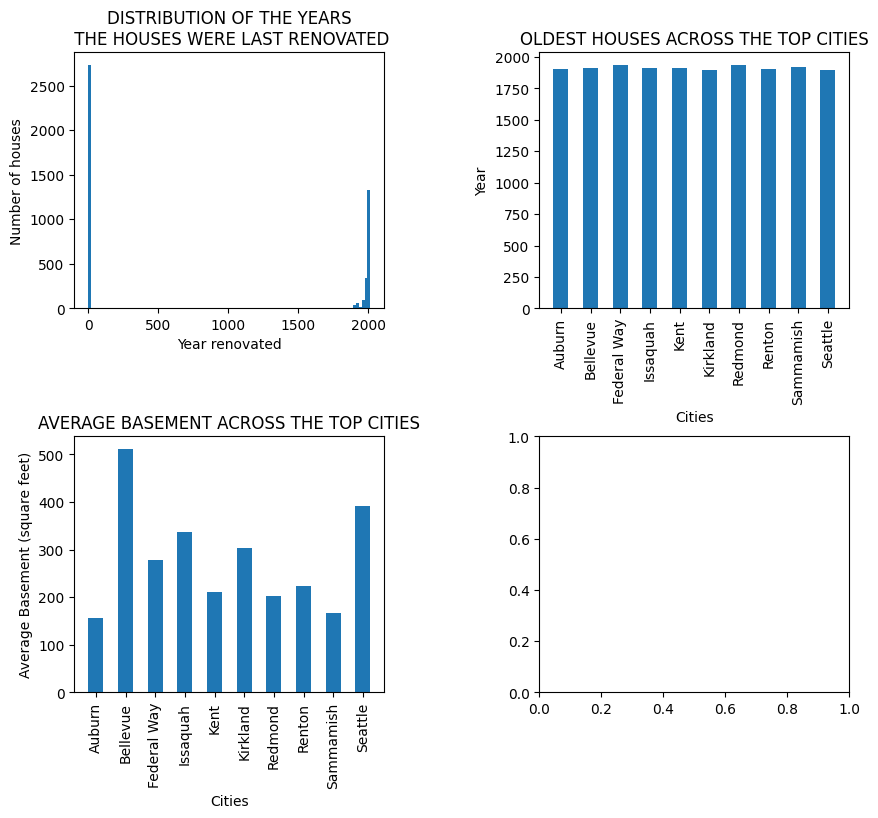

In [62]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

#The distribution of oldest houses across top 10 cities
year_built = top_10_city.groupby('city').yr_built.min().reset_index()
x = np.arange(len(year_built['city']))
y = year_built['yr_built']

ax2.bar(x,y, width=0.5)
ax2.set_xticks(x, year_built['city'], rotation='vertical')
ax2.set(xlabel="Cities", ylabel="Year", title="OLDEST HOUSES ACROSS THE TOP CITIES")


#The distribution of the years the houses were last renovated
ax1.hist(df['yr_renovated'], bins=100)
ax1.set(xlabel="Year renovated", ylabel="Number of houses", title="DISTRIBUTION OF THE YEARS\n THE HOUSES WERE LAST RENOVATED")


#The distribution of average basement square feets across top 10 cities
ave_basement = top_10_city.groupby('city').sqft_basement.mean().reset_index()
x = np.arange(len(ave_basement['city']))
y = ave_basement['sqft_basement']

ax3.bar(x,y, width=0.5)
ax3.set_xticks(x, ave_basement['city'], rotation='vertical')
ax3.set(xlabel="Cities", ylabel="Average Basement (square feet)", title="AVERAGE BASEMENT ACROSS THE TOP CITIES")


plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)

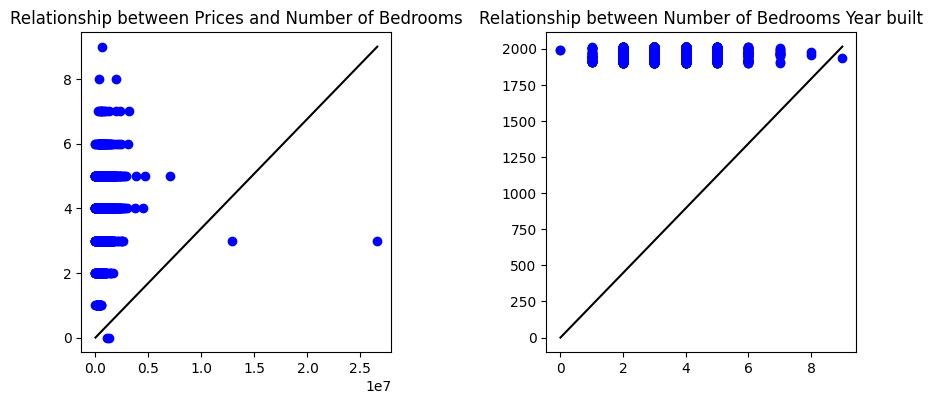

In [63]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#The relationship between prices and number of bedrooms
x = [0,26590000]
y = [0,9]

x1 = df['price']
y1 = df['bedrooms']
#plotting subplot 1
ax1.scatter(x1, y1, c ="blue")
ax1.plot(x,y, color = 'black', linestyle = '-')
ax1.set_title('Relationship between Prices and Number of Bedrooms')


x = [0,9]
y = [0,2014]

x1 = df['bedrooms']
y1 = df['yr_built']
#plotting subplot 2
ax2.scatter(x1, y1, c ="blue")
ax2.plot(x,y, color = 'black', linestyle = '-')
ax2.set_title('Relationship between Number of Bedrooms Year built')


plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)